In [1]:
%matplotlib inline
%reset -f

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.api import Poisson

The goal of this short exercise is to test the hypothesis that the performance of an ice hockey team increases with multiculturalism in the team. I use the data from NHL regular season 2018/19

# Load the data

In [5]:
df = pd.read_csv('data.csv', index_col='team')
df.head()

,points,num_players,num_nati,ages,caphit,nati_play_ratio
team,,,,,,
ANA,80,18,4,26.8,0.973,0.222
ARI,86,20,4,26.8,6.875,0.200
BOS,107,19,6,28.0,2.842,0.316
BUF,76,19,6,26.1,2.875,0.316
CAR,99,18,6,25.7,16.291,0.333


### Variables
- team: abbreviation of the NHL team
- points: number of points reached in the regular season (response variable)
- num_players: number of skaters who played at least 42 games for the given team + 2 goaltenders with the most games
- num_nati: number of nationalities in the team
- ages: average age of the players in the team at the beginning of the season (control variable)
- caphit: caphit in the season (control variable)
- nati_play_ratio: num_nati/num_players

# Visualisation
### Age

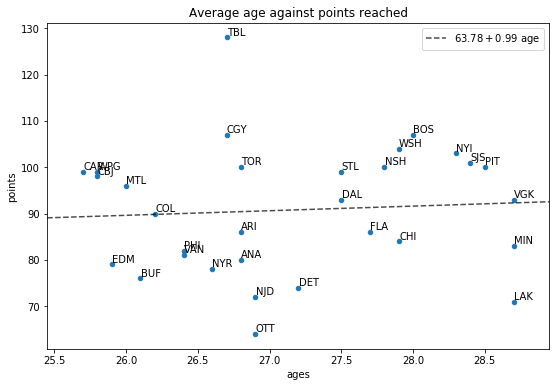

In [12]:
regressor = 'ages'

b,a = np.polyfit(df[regressor], df.points, 1)

xmin = df[regressor].min()-0.25
xmax = df[regressor].max()+0.25

fig, ax = plt.subplots(figsize=(9,6))

df.plot(regressor, 'points', kind='scatter', ax=ax)
ax.plot(np.linspace(xmin,xmax), a+b*np.linspace(xmin,xmax), 'k--', label=f"${a:.2f}+{b:.2f}$ age", alpha=0.7)

for team_name in df.index:
    ax.annotate(team_name, (df.loc[team_name][regressor]+0.002, df.loc[team_name]['points']+0.5))

ax.legend(loc=1)
ax.set(xlim=(xmin, xmax))
ax.set_xlabel(regressor)
ax.set_title('Average age against points reached')
plt.show()

### Caphit

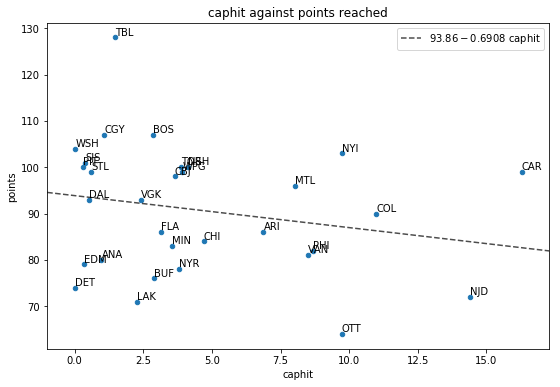

In [11]:
regressor = 'caphit'

b,a = np.polyfit(df[regressor], df.points, 1)

xmin = df[regressor].min()-1
xmax = df[regressor].max()+1

fig, ax = plt.subplots(figsize=(9,6))

df.plot(regressor, 'points', kind='scatter', ax=ax)
ax.plot(np.linspace(xmin,xmax), a+b*np.linspace(xmin,xmax), 'k--', label=f"${a:.2f}{b:.4f}$ caphit", alpha=0.7)

for team_name in df.index:
    ax.annotate(team_name, (df.loc[team_name][regressor]+0.002, df.loc[team_name]['points']+0.5))

ax.legend(loc=1)
ax.set(xlim=(xmin, xmax))
ax.set_xlabel(regressor)
ax.set_title('caphit against points reached')
plt.show()

### Number of nationalities

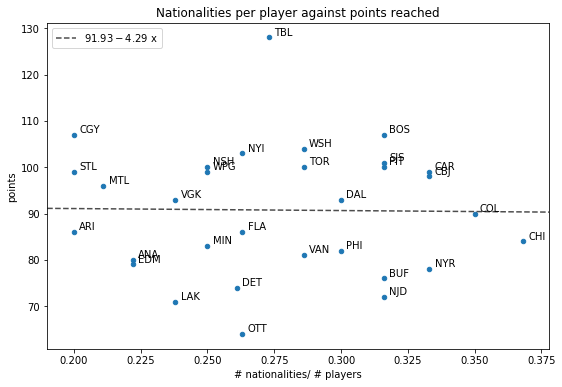

In [13]:
b,a = np.polyfit(df.nati_play_ratio, df.points, 1)

regressor = 'nati_play_ratio'

xmin = df[regressor].min()-0.01
xmax = df[regressor].max()+0.01

fig, ax = plt.subplots(figsize=(9,6))

df.plot(regressor, 'points', kind='scatter', ax=ax)
ax.plot(np.linspace(xmin,xmax), a+b*np.linspace(xmin,xmax), 'k--', label=f"${a:.2f}{b:.2f}$ x", alpha=0.7)

for team_name in df.index:
    ax.annotate(team_name, (df.loc[team_name][regressor]+0.002, df.loc[team_name]['points']+0.5))

ax.legend(loc=2)
ax.set(xlim=(xmin, xmax))
ax.set_xlabel('# nationalities/ # players')
ax.set_title('Nationalities per player against points reached')
plt.show()

# Multiculti index

The sheer number of natinalities is, from my point of view, not an exhaustive measure of multiculturalism. Assume there are 5 nationalities in the team, but 4 of them are represented by just one player. In such situation, there is one dominant nation in the team. Compare with another team with 5 nationalities as well, but evenly distributed. The latter team will definitely be more multicultural.

In [20]:
df1 = pd.read_csv('teams_nationalities.csv')
df1.head()

,team,ANA,ARI,BOS,BUF,CAR,CBJ,CGY,CHI,COL,...,PHI,PIT,SJS,STL,TBL,TOR,VAN,VGK,WPG,WSH
0,COL,0,0,0,0,0,0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
1,NLD,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,RUS,0,0,0,0,1,2,0,1,2,...,1,1,0,2,3,2,1,0,1,3
3,SWE,4,3,1,3,1,1,3,3,3,...,2,2,3,2,2,3,4,1,0,3
4,CZE,0,0,2,1,1,1,2,1,0,...,2,1,1,0,1,0,0,1,0,2


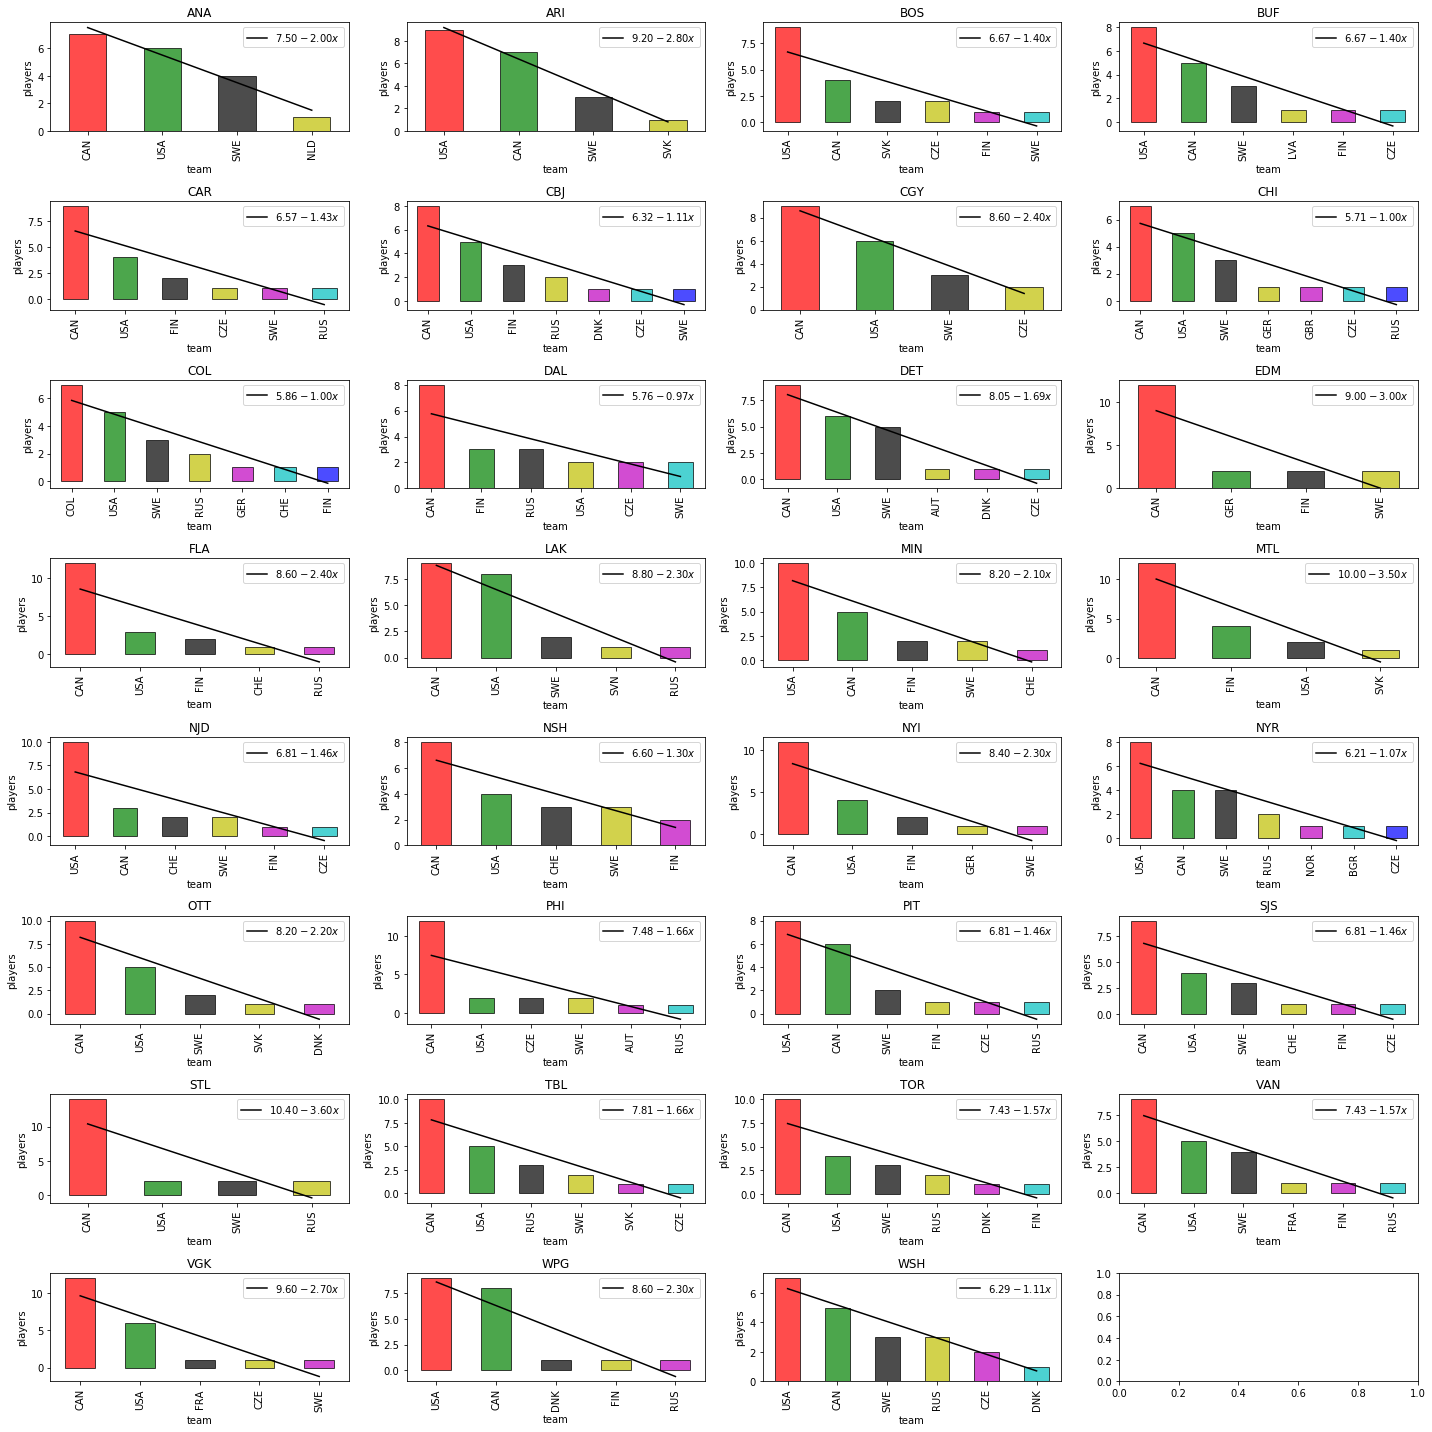

In [22]:
df1 = pd.read_csv('teams_nationalities.csv', index_col='team')

slopes = np.empty(31)
colors = list('rgkymcb')

fig, axes = plt.subplots(8,4, figsize=(20,20))
axes = axes.ravel()

for i, team_name in enumerate(df1.columns):
    ax = axes[i]
    dff = df1[df1!=0][team_name].dropna().astype('int')
    dff.sort_values(ascending=False, inplace=True)

    dom = np.arange(0,dff.shape[0])
    b,a = np.polyfit(dom, dff, deg=1)
    slopes[i] = b

    dff.plot(kind='bar', ax=ax, legend=False, label='', edgecolor='k', color=colors[:len(dff)], alpha=0.7)
    ax.plot(dom, a+b*dom, 'k', label=f'${a:.2f}{b:.2f}x$')
    ax.legend()
    ax.set_ylabel('players')
    ax.set_title(team_name)

plt.tight_layout()
plt.show()

The figure above depicts the number of players in each team divided by nationality. The line captures the skewness of the distribution. The steeper line, the less multicultural the team is. For example, compare Philadelphia Flyers (PHI) and Washington Capitals (WSH). There are 6 nationalities in both teams, but Philadelphia has a dominant group of Canadians, therefore Flyers are intuitively less multicultural. The slope of the line captures this fact. Now compate Flyers to Tampa Bay Lightning (TBL). Lightning has one nationality less than Flyers, but they are more evenly distributed. Hence the level of multiculturalism in both teams is similar. 

I create the Multiculti index (MCI) by adding the absolute value of the lowest slope to all slopes. Doing this, the least multicultural team has zero value of the index. Then, the index rises with the level of multiculturalism in the given team. See the figure below.

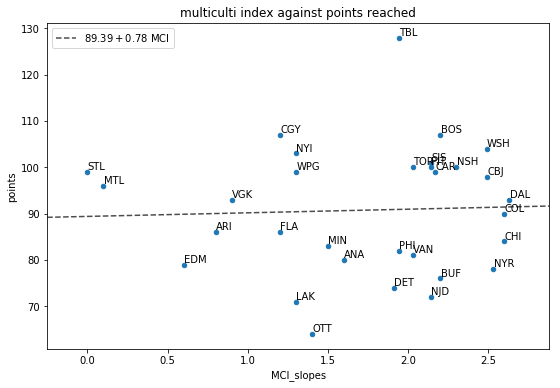

In [27]:
MCI_slopes = slopes+np.abs(slopes.min())
df['MCI_slopes'] = MCI_slopes.round(2)

regressor = 'MCI_slopes'

b,a = np.polyfit(df[regressor], df.points, 1)

xmin = df[regressor].min()-0.25
xmax = df[regressor].max()+0.25

fig, ax = plt.subplots(figsize=(9,6))

df.plot(regressor, 'points', kind='scatter', ax=ax)
ax.plot(np.linspace(xmin,xmax), a+b*np.linspace(xmin,xmax), 'k--', label=f"${a:.2f}+{b:.2f}$ MCI", alpha=0.7)

for team_name in df.index:
    ax.annotate(team_name, (df.loc[team_name][regressor]+0.002, df.loc[team_name]['points']+0.5))

ax.legend(loc=2)
ax.set(xlim=(xmin, xmax))
ax.set_xlabel(regressor)
ax.set_title('multiculti index against points reached')
plt.show()

# Model estimation

I estimate the following model

$ E[points|X] = \beta_0 + \beta_1 age + \beta_2 age^2 + \beta_3 caphit + \beta_4 MCI $

The response variable is always positive and its values are integers. Hence standard linear regression is inappropriate. Instead, I assume Poisson distribution and estimate the model by maximum likelihood.

In [28]:
from statsmodels.iolib.summary2 import summary_col

df['const'] = 1
df['ages_sq'] = df.ages**2

reg1 = ['const', 'ages', 'ages_sq', 'caphit', 'nati_play_ratio']
reg2 = ['const', 'ages', 'ages_sq', 'caphit', 'MCI_slopes']

info_dict = {'':'', 'Pseudo R-squared': lambda x: f"{x.prsquared:.2f}",
            'No. observations': lambda x: f"{int(x.nobs):d}"}

results = []
for reg in [reg1, reg2]:
    mod = Poisson(endog=df.points, exog=df[reg]).fit(cov_type='HC0', disp=False)
    results.append(mod)
    
results_table = summary_col(results=results, model_names=['mod 1', 'mod 2'],
                            regressor_order=['const', 'ages', 'ages_sq', 'caphit', 'nati_play_ratio', 'MCI_slopes'],
                           stars=True, info_dict=info_dict)

results_table.add_title('Tab 1 - Performance of NHL teams in 2018/19 season')
print(results_table)

Tab 1 - Performance of NHL teams in 2018/19 season
                   mod 1     mod 2  
------------------------------------
const            13.3557   15.1031  
                 (24.1423) (23.8645)
ages             -0.6481   -0.7751  
                 (1.7786)  (1.7593) 
ages_sq          0.0118    0.0142   
                 (0.0327)  (0.0324) 
caphit           -0.0087   -0.0085  
                 (0.0077)  (0.0074) 
nati_play_ratio  0.1600             
                 (0.4576)           
MCI_slopes                 0.0148   
                           (0.0278) 
                                    
Pseudo R-squared 0.01      0.01     
No. observations 31        31       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


I estimate two models, one with naive measure of multiculturalism (nationalities per player) and the other with MCI based on slopes. The models predict very poorly. The most significant variable is the caphit, but it is still not even at the significance level 0.1. $R^2$ is also very low. Hence I have not explained much with this model. But it was fun anyway :)